In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
#여러개의 파일 불러오기 
import os

files = os.listdir('./data_유전')
files

['TCGA_BRCA.csv', 'TCGA_COAD.csv', 'TCGA_LUAD.csv', 'TCGA_THCA.csv']

In [4]:
new_df = pd.DataFrame()

for file in files:
    read_data = pd.read_csv('./data_유전/'+file)
    new_df = pd.concat([new_df, read_data], axis=0)
    print(file[:-4]) #이게 레이블이 될 값?

TCGA_BRCA
TCGA_COAD
TCGA_LUAD
TCGA_THCA


In [5]:
new_df.head()
#왜 Nan이 뜨지 데이터 보면 없는것도 있다.. 왜지??? 

,952,2511,2095,1097,1009,2868,987,3553,1217,4259,...,6745,4224,2131.1,5128,5735.1,4742.1,1072,5973,3677.1,4923.1
0,2.0,40.0,19.0,24.0,65.0,10.0,249.0,1076.0,0.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1041.0,1455.0,1680.0,3564.0,547.0,3009.0,1830.0,1360.0,1543.0,1644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,906.0,1978.0,960.0,1629.0,3914.0,4780.0,1569.0,1163.0,998.0,3485.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,289.0,725.0,397.0,2180.0,799.0,1571.0,563.0,289.0,1033.0,557.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,347.0,1061.0,253.0,852.0,289.0,1873.0,718.0,936.0,188.0,386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 파일 불러오는 부분 numpy로 해보기로 함.
files = os.listdir("./data_유전")
data = []
label = []
for i, file in enumerate(files):
    book = np.loadtxt("./data_유전/" + file, delimiter=",", dtype=np.float32).transpose()

    label.append(file[:-4])
    for el in book:
        print("시작",el,"끝") #열단위로 읽어오는 거 확인
        
        #여기서 노멀라이즈
        data.append((el / np.max(el), i))
                
files

시작 [ 952.    2. 1041. ...   32.  656. 1707.] 끝
시작 [2511.   40. 1455. ...   63. 3480. 2171.] 끝
시작 [2095.   19. 1680. ...   43.  160. 2272.] 끝
시작 [1097.   24. 3564. ...    6.  378. 2076.] 끝
시작 [1009.   65.  547. ...   45.  356. 4964.] 끝
시작 [2868.   10. 3009. ...    5.  975. 3295.] 끝
시작 [ 987.  249. 1830. ...   81.  514. 2765.] 끝
시작 [3553. 1076. 1360. ...   22.  129. 2422.] 끝
시작 [1217.    0. 1543. ...    0. 1853. 1045.] 끝
시작 [4259.   47. 1644. ...   54.  557. 1963.] 끝
시작 [ 925.    5. 2761. ...  136.  402. 4918.] 끝
시작 [2.542e+03 1.000e+00 2.623e+03 ... 3.000e+00 1.830e+03 1.658e+03] 끝
시작 [2.299e+03 5.000e+00 7.080e+02 ... 1.000e+00 2.540e+03 1.052e+03] 끝
시작 [3.490e+03 1.600e+01 7.892e+03 ... 2.000e+00 5.910e+03 2.680e+03] 끝
시작 [6095.    7. 4129. ...   17.  475. 3882.] 끝
시작 [1.304e+03 1.000e+00 2.026e+03 ... 2.400e+01 4.590e+02 1.924e+03] 끝
시작 [3654. 1678. 1497. ...   50.  150. 2500.] 끝
시작 [4180.  610. 1199. ...   55.   82. 2083.] 끝
시작 [4784.   34. 1947. ...   36.  635. 1581.] 끝
시작 [2014.  

시작 [1.646e+03 1.000e+00 1.839e+03 ... 1.000e+01 4.010e+02 1.947e+03] 끝
시작 [3.308e+03 2.000e+00 3.652e+03 ... 1.000e+00 3.640e+02 3.420e+03] 끝
시작 [ 914.    7. 2397. ...  104.  203. 3657.] 끝
시작 [3426.  210. 2111. ...   87.  160. 3223.] 끝
시작 [3978.   51. 2162. ...   74.  402. 1911.] 끝
시작 [4150.   17. 3870. ...   56.  698. 1747.] 끝
시작 [5.224e+03 1.000e+00 3.995e+03 ... 9.500e+01 4.380e+02 1.963e+03] 끝
시작 [1034.   11. 6043. ...   36. 9287. 2432.] 끝
시작 [6988.   57. 1958. ...  124.  692. 2677.] 끝
시작 [1312.    9. 2277. ...   18.  742. 2780.] 끝
시작 [1454.   11. 4174. ...   53. 3337. 5400.] 끝
시작 [1.278e+03 4.000e+00 3.166e+03 ... 4.000e+00 6.515e+03 2.222e+03] 끝
시작 [6240.   91. 2764. ...   81.  180. 2966.] 끝
시작 [ 795.  114. 1996. ...  101.  398. 4025.] 끝
시작 [ 685.    0. 1615. ...   79.  124. 2823.] 끝
시작 [3066.  143. 2148. ...   14.  224. 1567.] 끝
시작 [8.985e+03 7.000e+00 1.277e+03 ... 1.200e+01 2.010e+02 2.019e+03] 끝
시작 [1786.    9. 1421. ...   30.  202. 1051.] 끝
시작 [2152.   12. 1726. ...   97.   

시작 [3383.    7. 3472. ...  132.  257. 3668.] 끝
시작 [ 293.   10. 9788. ...   66.  528. 3236.] 끝
시작 [3478.    7. 1650. ...   46.  171. 3131.] 끝
시작 [2635.    0. 4248. ...    8.  639. 4971.] 끝
시작 [2638.    7. 1544. ...   66.   59. 1826.] 끝
시작 [2.371e+03 2.000e+00 1.383e+03 ... 2.000e+01 3.060e+02 2.582e+03] 끝
시작 [3612.   20. 1805. ...  141.    8.  916.] 끝
시작 [3944.    8. 1220. ...   33.  473. 1523.] 끝
시작 [4.707e+03 1.000e+00 1.812e+03 ... 5.000e+00 1.002e+03 1.289e+03] 끝
시작 [1.197e+03 1.000e+00 1.405e+03 ... 3.000e+00 1.210e+02 1.833e+03] 끝
시작 [1516.    3. 1750. ...    7.  186. 2815.] 끝
시작 [1774.    8. 1985. ...    4.  987. 1787.] 끝
시작 [2021.   72. 1810. ...   83.  217. 2400.] 끝
시작 [6141.   27. 2689. ...   47.  427. 2223.] 끝
시작 [4.296e+03 4.000e+00 2.616e+03 ... 1.700e+01 1.947e+03 3.189e+03] 끝
시작 [2066.   15. 2166. ...   80.  122. 5897.] 끝
시작 [4854. 4164. 1658. ...   49.  169. 3120.] 끝
시작 [2406.   16. 1290. ...   41.  298. 1807.] 끝
시작 [1698.   10. 1914. ...   34.  235. 1896.] 끝
시작 [2608.  

시작 [4855.   15. 1011. ...    0.  338.  505.] 끝
시작 [6.156e+03 3.100e+01 2.258e+03 ... 1.000e+00 7.010e+02 1.495e+03] 끝
시작 [4501.   24. 1163. ...   21.  251. 1554.] 끝
시작 [4151.   44.  974. ...    0.  204. 1117.] 끝
시작 [8063.   76. 2425. ...   16. 6122. 4948.] 끝
시작 [3.100e+03 1.000e+00 2.108e+03 ... 2.000e+00 4.880e+03 1.864e+03] 끝
시작 [15621.   356.  5922. ...    44.   511.  2250.] 끝
시작 [6146.   85. 1543. ...   14.  278. 1863.] 끝
시작 [9.579e+03 9.100e+01 1.861e+03 ... 9.000e+00 1.371e+03 1.806e+03] 끝
시작 [14794.    65.  5528. ...    21.   641.  1597.] 끝
시작 [7600.   33. 1243. ...   27.  238. 1212.] 끝
시작 [9553.  108. 4250. ...   14. 6390. 2648.] 끝
시작 [2274.   44. 1719. ...    0.  602. 1163.] 끝
시작 [2943.    9. 2020. ...    0.  543.  630.] 끝
시작 [1360.    3.  399. ...    0. 2036.  585.] 끝
시작 [2.417e+03 3.000e+00 1.469e+03 ... 0.000e+00 3.864e+03 1.773e+03] 끝
시작 [3062.    6. 1532. ...   15.  404. 2452.] 끝
시작 [1.968e+03 0.000e+00 7.380e+02 ... 1.000e+00 1.362e+03 7.250e+02] 끝
시작 [9839.   51. 2346. 

시작 [4.929e+03 8.000e+00 1.089e+03 ... 2.000e+00 3.420e+02 1.031e+03] 끝
시작 [4.776e+03 3.100e+01 5.440e+02 ... 3.000e+00 1.760e+02 8.460e+02] 끝
시작 [2.1648e+04 8.3000e+01 5.7470e+03 ... 1.0000e+00 2.9300e+02 2.3500e+03] 끝
시작 [9.860e+02 3.000e+00 3.920e+02 ... 2.000e+00 2.931e+03 1.082e+03] 끝
시작 [5642.   20. 4033. ...   25.  840. 2231.] 끝
시작 [7339.   30. 1698. ...   12.  216. 1113.] 끝
시작 [2.744e+03 2.000e+00 1.212e+03 ... 1.000e+00 1.400e+03 1.218e+03] 끝
시작 [4767.  277. 1802. ...   14. 1723. 1577.] 끝
시작 [3211.   14. 2475. ...    7. 2116. 2076.] 끝
시작 [1.106e+04 5.000e+01 2.486e+03 ... 5.000e+00 1.578e+03 1.719e+03] 끝
시작 [1467.    6.  821. ...    0.  350.  727.] 끝
시작 [3491.   32. 1099. ...    5.  661. 1809.] 끝
시작 [3305.   88.  653. ...   10. 1388.  666.] 끝
시작 [4335.    7. 1640. ...    0. 1185. 2249.] 끝
시작 [6.406e+03 1.500e+01 4.113e+03 ... 2.000e+00 7.990e+02 2.057e+03] 끝
시작 [2356.    4.  317. ...    0.  446.  540.] 끝
시작 [2165.    7. 1071. ...    0.  569.  603.] 끝
시작 [4.668e+03 5.400e+01 1.6

시작 [1215.    0. 1364. ...   36. 3540. 3120.] 끝
시작 [3.275e+03 0.000e+00 9.210e+02 ... 2.000e+00 6.820e+02 1.415e+03] 끝
시작 [7902.   44. 3037. ...   74. 2573. 2384.] 끝
시작 [4165.    0. 2450. ...   85. 1166. 3340.] 끝
시작 [3381.    0. 2254. ...    8. 2468. 2351.] 끝
시작 [3461.    0. 2688. ...   28. 4799. 7712.] 끝
시작 [8.510e+02 1.000e+00 1.249e+03 ... 1.300e+01 2.160e+02 1.704e+03] 끝
시작 [2273.   18.  935. ...   14. 1422. 1174.] 끝
시작 [1786.    0.  914. ...   13. 1961. 1016.] 끝
시작 [6093.    0. 2130. ...    0. 2074. 1808.] 끝
시작 [5.659e+03 1.000e+00 1.212e+03 ... 1.000e+00 1.720e+02 1.684e+03] 끝
시작 [5.130e+03 1.000e+00 1.580e+03 ... 5.500e+01 9.450e+02 2.291e+03] 끝
시작 [1.702e+03 2.000e+00 2.124e+03 ... 9.000e+00 6.772e+03 3.334e+03] 끝
시작 [1710.    0.  707. ...    8.  345. 1296.] 끝
시작 [2181.   24. 1389. ...   23. 2438. 1557.] 끝
시작 [2.269e+03 1.000e+00 8.190e+02 ... 2.300e+01 1.280e+03 3.404e+03] 끝
시작 [ 725.    0.  769. ...   19.  305. 1883.] 끝
시작 [3.453e+03 1.000e+00 1.468e+03 ... 6.000e+00 3.650e+03

시작 [4.426e+03 1.000e+00 2.140e+03 ... 1.200e+02 9.900e+01 2.724e+03] 끝
시작 [3237.    0. 2561. ...  129.  153. 2661.] 끝
시작 [7.548e+03 1.000e+00 1.372e+03 ... 1.200e+02 2.810e+02 2.768e+03] 끝
시작 [2912.    0. 1995. ...   39. 1530. 1342.] 끝
시작 [3457.    7. 1660. ...  262.  125. 2918.] 끝
시작 [3.644e+03 1.000e+00 1.717e+03 ... 2.600e+01 1.731e+03 1.350e+03] 끝
시작 [1759.    4. 1123. ...   14.  751. 2044.] 끝
시작 [6307.    7. 1999. ...  109.  446. 2444.] 끝
시작 [3953.    5. 1407. ...   36.  541. 2098.] 끝
시작 [2.858e+03 1.000e+00 1.690e+03 ... 9.000e+01 6.340e+02 1.809e+03] 끝
시작 [3.843e+03 1.000e+00 2.163e+03 ... 8.300e+01 1.788e+03 2.816e+03] 끝
시작 [4.118e+03 5.000e+00 2.114e+03 ... 1.680e+02 1.590e+02 6.768e+03] 끝
시작 [5645.    0. 2200. ...  123.  523. 2760.] 끝
시작 [2862.   12. 1525. ...   72.  297. 1962.] 끝
시작 [4.746e+03 3.000e+00 2.177e+03 ... 5.600e+01 1.184e+03 2.168e+03] 끝
시작 [4494.    0. 1843. ...   55.  406. 1897.] 끝
시작 [3220.    6. 1645. ...   26.  661. 1629.] 끝
시작 [3.627e+03 1.000e+00 1.939e+03

['TCGA_BRCA.csv', 'TCGA_COAD.csv', 'TCGA_LUAD.csv', 'TCGA_THCA.csv']

In [7]:
data

[(array([6.6769158e-04, 1.4027135e-06, 7.3011231e-04, ..., 2.2443415e-05,
         4.6009000e-04, 1.1972159e-03], dtype=float32),
  0),
 (array([3.5079729e-03, 5.5881686e-05, 2.0326963e-03, ..., 8.8013658e-05,
         4.8617069e-03, 3.0329786e-03], dtype=float32),
  0),
 (array([4.2694546e-03, 3.8720591e-05, 3.4237152e-03, ..., 8.7630811e-05,
         3.2606814e-04, 4.6301675e-03], dtype=float32),
  0),
 (array([1.6551270e-03, 3.6210618e-05, 5.3772768e-03, ..., 9.0526546e-06,
         5.7031726e-04, 3.1322185e-03], dtype=float32),
  0),
 (array([8.7000907e-04, 5.6046174e-05, 4.7165013e-04, ..., 3.8801198e-05,
         3.0696060e-04, 4.2802035e-03], dtype=float32),
  0),
 (array([4.1071055e-03, 1.4320452e-05, 4.3090237e-03, ..., 7.1602258e-06,
         1.3962440e-03, 4.7185887e-03], dtype=float32),
  0),
 (array([0.00174374, 0.00043991, 0.00323308, ..., 0.0001431 , 0.00090809,
         0.00488495], dtype=float32),
  0),
 (array([9.2463922e-03, 2.8002020e-03, 3.5392886e-03, ..., 5.72532

In [8]:
label

['TCGA_BRCA', 'TCGA_COAD', 'TCGA_LUAD', 'TCGA_THCA']

In [9]:
import random
random.shuffle(data)

In [10]:
x_train = []
x_test = []
y_train = []
y_test = []

for i, el in enumerate(data):
    if i < 0.8*len(data):
        print('el', el)
        x_train.append(el[0])
        print('el0',el[0])
        y_train.append(el[1])
        print('el1',el[1])
    else:
        x_test.append(el[0])
        y_test.append(el[1])


el (array([1.8173398e-03, 6.6154214e-05, 1.7162076e-03, ..., 3.2696909e-05,
       1.9618146e-04, 1.8561200e-03], dtype=float32), 0)
el0 [1.8173398e-03 6.6154214e-05 1.7162076e-03 ... 3.2696909e-05 1.9618146e-04
 1.8561200e-03]
el1 0
el (array([4.5032408e-03, 3.0061688e-06, 1.5080946e-03, ..., 1.4730227e-04,
       1.1834285e-03, 2.4460193e-03], dtype=float32), 3)
el0 [4.5032408e-03 3.0061688e-06 1.5080946e-03 ... 1.4730227e-04 1.1834285e-03
 2.4460193e-03]
el1 3
el (array([2.8589971e-03, 4.5756155e-06, 1.4725856e-03, ..., 1.5252052e-04,
       6.5583823e-04, 2.9100915e-03], dtype=float32), 3)
el0 [2.8589971e-03 4.5756155e-06 1.4725856e-03 ... 1.5252052e-04 6.5583823e-04
 2.9100915e-03]
el1 3
el (array([4.8902757e-03, 5.8196783e-06, 1.1557881e-03, ..., 5.8196787e-07,
       9.0205017e-04, 1.5253377e-03], dtype=float32), 1)
el0 [4.8902757e-03 5.8196783e-06 1.1557881e-03 ... 5.8196787e-07 9.0205017e-04
 1.5253377e-03]
el1 1
el (array([1.1104268e-03, 4.6833691e-07, 4.2126904e-04, ..., 5.3

       1.6886745e-04, 6.5522699e-04], dtype=float32), 0)
el0 [4.4534128e-04 5.7532128e-05 5.7265774e-04 ... 1.0654097e-06 1.6886745e-04
 6.5522699e-04]
el1 0
el (array([3.6490501e-03, 1.0015691e-05, 8.4415581e-03, ..., 1.1184189e-04,
       1.9563984e-03, 6.7438986e-03], dtype=float32), 0)
el0 [3.6490501e-03 1.0015691e-05 8.4415581e-03 ... 1.1184189e-04 1.9563984e-03
 6.7438986e-03]
el1 0
el (array([0.0154504 , 0.00061139, 0.00248895, ..., 0.        , 0.01210156,
       0.00260728], dtype=float32), 1)
el0 [0.0154504  0.00061139 0.00248895 ... 0.         0.01210156 0.00260728]
el1 1
el (array([5.3242967e-04, 2.5305593e-07, 3.3416037e-04, ..., 3.8591032e-05,
       1.5562940e-05, 3.4339691e-04], dtype=float32), 3)
el0 [5.3242967e-04 2.5305593e-07 3.3416037e-04 ... 3.8591032e-05 1.5562940e-05
 3.4339691e-04]
el1 3
el (array([5.9030419e-03, 9.3855895e-05, 3.4356199e-03, ..., 1.1608493e-04,
       1.7289244e-04, 7.3553384e-03], dtype=float32), 0)
el0 [5.9030419e-03 9.3855895e-05 3.4356199e-

el1 3
el (array([7.4928993e-04, 3.2763006e-07, 3.6579897e-04, ..., 1.3105202e-05,
       1.6381502e-05, 7.2144141e-04], dtype=float32), 3)
el0 [7.4928993e-04 3.2763006e-07 3.6579897e-04 ... 1.3105202e-05 1.6381502e-05
 7.2144141e-04]
el1 3
el (array([4.7029308e-03, 1.8500908e-06, 4.8527881e-03, ..., 5.5502724e-06,
       3.3856663e-03, 3.0674506e-03], dtype=float32), 0)
el0 [4.7029308e-03 1.8500908e-06 4.8527881e-03 ... 5.5502724e-06 3.3856663e-03
 3.0674506e-03]
el1 0
el (array([9.4374390e-03, 1.0011739e-04, 1.9616408e-03, ..., 1.2102102e-05,
       3.4986078e-04, 2.0474556e-03], dtype=float32), 1)
el0 [9.4374390e-03 1.0011739e-04 1.9616408e-03 ... 1.2102102e-05 3.4986078e-04
 2.0474556e-03]
el1 1
el (array([3.1334476e-03, 1.3529566e-05, 3.0360348e-03, ..., 2.4353219e-05,
       3.0279169e-03, 4.2915782e-03], dtype=float32), 0)
el0 [3.1334476e-03 1.3529566e-05 3.0360348e-03 ... 2.4353219e-05 3.0279169e-03
 4.2915782e-03]
el1 0
el (array([3.6617185e-03, 1.9155466e-04, 3.2503800e-03, ..

 9.5272326e-04]
el1 3
el (array([0.01115182, 0.00071294, 0.00526658, ..., 0.00015639, 0.00048066,
       0.00661428], dtype=float32), 0)
el0 [0.01115182 0.00071294 0.00526658 ... 0.00015639 0.00048066 0.00661428]
el1 0
el (array([8.1129102e-03, 5.9435239e-05, 3.3814404e-03, ..., 6.3680613e-06,
       7.4506318e-03, 4.4916058e-03], dtype=float32), 1)
el0 [8.1129102e-03 5.9435239e-05 3.3814404e-03 ... 6.3680613e-06 7.4506318e-03
 4.4916058e-03]
el1 1
el (array([0.01217907, 0.00010253, 0.00409027, ..., 0.        , 0.0172838 ,
       0.00672358], dtype=float32), 1)
el0 [0.01217907 0.00010253 0.00409027 ... 0.         0.0172838  0.00672358]
el1 1
el (array([1.5030979e-02, 1.7951783e-04, 3.6129984e-03, ..., 1.6172777e-06,
       4.5154393e-03, 3.1148768e-03], dtype=float32), 1)
el0 [1.5030979e-02 1.7951783e-04 3.6129984e-03 ... 1.6172777e-06 4.5154393e-03
 3.1148768e-03]
el1 1
el (array([1.7565998e-03, 0.0000000e+00, 1.6849019e-03, ..., 7.1697950e-06,
       2.8487986e-03, 1.1713055e-02], dt

el (array([2.4836103e-03, 3.3873571e-06, 2.2302358e-03, ..., 2.5066443e-05,
       2.8589295e-04, 2.7342746e-03], dtype=float32), 0)
el0 [2.4836103e-03 3.3873571e-06 2.2302358e-03 ... 2.5066443e-05 2.8589295e-04
 2.7342746e-03]
el1 0
el (array([6.2682119e-04, 1.0129625e-06, 4.8237274e-04, ..., 4.5785902e-05,
       2.3095545e-05, 4.5725127e-04], dtype=float32), 3)
el0 [6.2682119e-04 1.0129625e-06 4.8237274e-04 ... 4.5785902e-05 2.3095545e-05
 4.5725127e-04]
el1 3
el (array([6.5947534e-03, 1.6713208e-04, 6.3649467e-03, ..., 7.6602206e-05,
       4.3872170e-04, 5.0383359e-03], dtype=float32), 0)
el0 [6.5947534e-03 1.6713208e-04 6.3649467e-03 ... 7.6602206e-05 4.3872170e-04
 5.0383359e-03]
el1 0
el (array([1.8542649e-03, 1.3575317e-04, 2.3026618e-03, ..., 7.7132485e-05,
       1.7545068e-03, 3.4442225e-03], dtype=float32), 0)
el0 [1.8542649e-03 1.3575317e-04 2.3026618e-03 ... 7.7132485e-05 1.7545068e-03
 3.4442225e-03]
el1 0
el (array([3.5884730e-03, 9.6102649e-06, 4.2554257e-03, ..., 5.7

       4.1607971e-05, 2.9907611e-04], dtype=float32), 3)
el0 [4.2430105e-04 2.6067646e-06 2.3922078e-04 ... 1.0026018e-05 4.1607971e-05
 2.9907611e-04]
el1 3
el (array([1.5492572e-03, 1.0001660e-06, 8.6114294e-04, ..., 5.3008800e-05,
       3.6506061e-04, 1.1641933e-03], dtype=float32), 3)
el0 [1.5492572e-03 1.0001660e-06 8.6114294e-04 ... 5.3008800e-05 3.6506061e-04
 1.1641933e-03]
el1 3
el (array([2.8060222e-04, 0.0000000e+00, 6.6156586e-04, ..., 3.2361426e-05,
       5.0795148e-05, 1.1564089e-03], dtype=float32), 0)
el0 [2.8060222e-04 0.0000000e+00 6.6156586e-04 ... 3.2361426e-05 5.0795148e-05
 1.1564089e-03]
el1 0
el (array([5.2679720e-04, 2.6980649e-06, 6.1886862e-04, ..., 1.1129518e-05,
       8.5663560e-05, 1.0734926e-03], dtype=float32), 0)
el0 [5.2679720e-04 2.6980649e-06 6.1886862e-04 ... 1.1129518e-05 8.5663560e-05
 1.0734926e-03]
el1 0
el (array([6.76069185e-02, 9.71613219e-04, 1.46413995e-02, ...,
       2.80003815e-06, 5.06806886e-04, 6.86849328e-03], dtype=float32), 1)
e

el1 3
el (array([5.0263163e-03, 1.8952927e-06, 2.5311634e-03, ..., 1.9142457e-04,
       1.1381232e-03, 2.6960538e-03], dtype=float32), 3)
el0 [5.0263163e-03 1.8952927e-06 2.5311634e-03 ... 1.9142457e-04 1.1381232e-03
 2.6960538e-03]
el1 3
el (array([1.9070020e-02, 7.7011689e-05, 6.2475735e-03, ..., 0.0000000e+00,
       2.4354947e-03, 1.7295541e-03], dtype=float32), 1)
el0 [1.9070020e-02 7.7011689e-05 6.2475735e-03 ... 0.0000000e+00 2.4354947e-03
 1.7295541e-03]
el1 1
el (array([7.9792924e-02, 1.4948389e-04, 1.4138029e-02, ..., 7.8675730e-06,
       4.0124622e-03, 3.6820241e-03], dtype=float32), 1)
el0 [7.9792924e-02 1.4948389e-04 1.4138029e-02 ... 7.8675730e-06 4.0124622e-03
 3.6820241e-03]
el1 1
el (array([9.8512648e-03, 5.4376671e-04, 4.6789902e-03, ..., 6.7790548e-05,
       2.6697938e-03, 2.7231607e-03], dtype=float32), 0)
el0 [9.8512648e-03 5.4376671e-04 4.6789902e-03 ... 6.7790548e-05 2.6697938e-03
 2.7231607e-03]
el1 0
el (array([1.6715074e-03, 2.2376271e-06, 8.1375038e-04, ..

 6.8935207e-03]
el1 0
el (array([3.9790226e-03, 1.0758455e-04, 1.9814826e-03, ..., 4.4960707e-05,
       4.4880420e-04, 2.5924665e-03], dtype=float32), 0)
el0 [3.9790226e-03 1.0758455e-04 1.9814826e-03 ... 4.4960707e-05 4.4880420e-04
 2.5924665e-03]
el1 0
el (array([1.6478027e-03, 9.1991774e-07, 5.1193422e-04, ..., 3.3806977e-05,
       1.1337986e-04, 5.8690750e-04], dtype=float32), 3)
el0 [1.6478027e-03 9.1991774e-07 5.1193422e-04 ... 3.3806977e-05 1.1337986e-04
 5.8690750e-04]
el1 3
el (array([5.34989461e-02, 2.06233890e-04, 1.27396295e-02, ...,
       9.37426739e-06, 1.26552617e-03, 5.38082980e-03], dtype=float32), 1)
el0 [5.34989461e-02 2.06233890e-04 1.27396295e-02 ... 9.37426739e-06
 1.26552617e-03 5.38082980e-03]
el1 1
el (array([1.9591013e-03, 2.3546893e-06, 1.0549007e-03, ..., 9.4187571e-06,
       1.6612333e-03, 2.4100244e-03], dtype=float32), 2)
el0 [1.9591013e-03 2.3546893e-06 1.0549007e-03 ... 9.4187571e-06 1.6612333e-03
 2.4100244e-03]
el1 2
el (array([1.7334366e-03, 2.67

In [11]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [18]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(2000),
    keras.layers.Dense(800, activation="relu"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(256, activation="relu"),
     keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(4, activation='softmax')
])

# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam", metrics=["accuracy"],
              loss="sparse_categorical_crossentropy")

In [19]:
stop_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history=model.fit(x_train, y_train, epochs=20, validation_data= (x_test, y_test), callbacks=[stop_callback])

Epoch 1/20
73/73 [==============================] - 1s 9ms/step - loss: 0.4755 - accuracy: 0.8133 - val_loss: 0.0663 - val_accuracy: 0.9897
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.0621 - accuracy: 0.9862 - val_loss: 0.0173 - val_accuracy: 0.9948
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.0386 - accuracy: 0.9888 - val_loss: 0.0512 - val_accuracy: 0.9914
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.0701 - accuracy: 0.9884 - val_loss: 0.5934 - val_accuracy: 0.9449
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1353 - accuracy: 0.9845 - val_loss: 0.0461 - val_accuracy: 0.9948
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.0394 - accuracy: 0.9953 - val_loss: 0.0797 - val_accuracy: 0.9948
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 8.2186e-04 - accuracy: 0.9996 - val_loss: 0.0579 - val_accuracy: 0.9914
Epoch 8/20
73/73

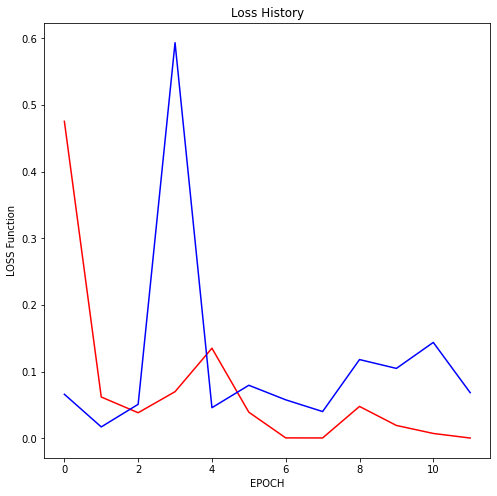

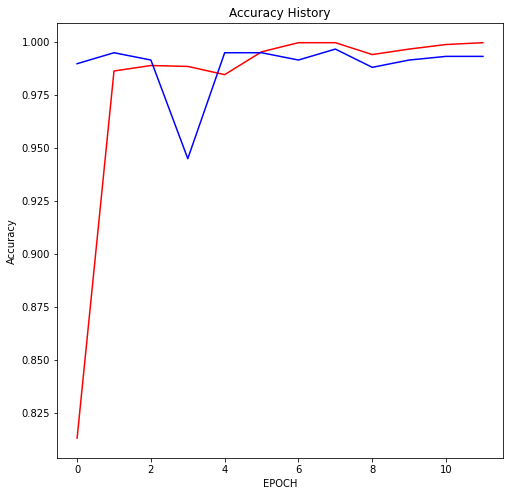

In [20]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

# CNN 

## MNIST 

In [21]:
from tensorflow.keras import datasets

In [22]:
mnist = datasets.mnist

In [23]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [24]:
#이미지 데이터 전처리 
x_train, x_test = x_train/255.0, x_test/255.0

In [32]:
model= keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                 keras.layers.Dense(128, activation='relu'),
                keras.layers.Dropout(rate=0.5),
                 keras.layers.Dense(10,activation='softmax')])

In [33]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

stop_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=stop_callback)


Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3922 - accuracy: 0.8842 - val_loss: 0.1764 - val_accuracy: 0.9485
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2222 - accuracy: 0.9339 - val_loss: 0.1297 - val_accuracy: 0.9606
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1879 - accuracy: 0.9433 - val_loss: 0.1029 - val_accuracy: 0.9698
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1644 - accuracy: 0.9508 - val_loss: 0.0970 - val_accuracy: 0.9703
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1485 - accuracy: 0.9543 - val_loss: 0.0906 - val_accuracy: 0.9721
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1396 - accuracy: 0.9572 - val_loss: 0.0853 - val_accuracy: 0.9764
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1320 - accuracy: 0.9592 - val_loss: 0.0878 - val_accuracy:

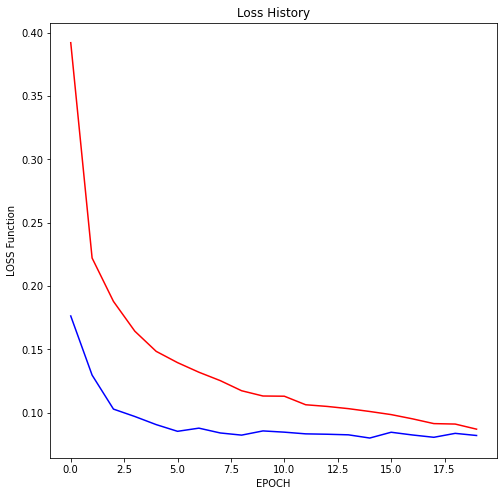

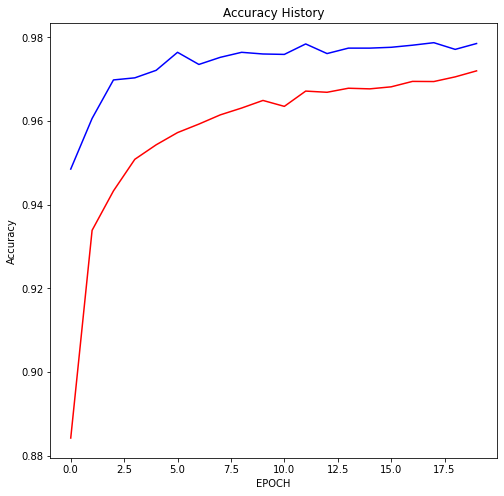

In [34]:
train_history = history.history['loss']
validation_history = history.history['val_loss']
fig = plt.figure(figsize=(8,8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

## 사람과 사물 구분 

In [124]:
cifar = datasets.cifar10
(x_train_ori, y_train), (x_test_ori, y_test) = cifar.load_data()

In [125]:
x_train_ori.shape

(50000, 32, 32, 3)

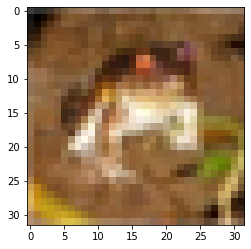

In [126]:
plt.imshow(x_train_ori[0])
plt.show()

In [130]:
def preprocess(images):
    images = images / 255.0
    r = images[:, :, :, 0]
    g = images[:, :, :, 1]
    b = images[:, :, :, 2]
    return (r + g + b) / 3.0 #이건 왜 하는걸까?? - 흑백으로 만드는거 

In [131]:
x_train = preprocess(x_train_ori)
x_test =preprocess(x_test_ori)


In [132]:
x_train.shape

(50000, 32, 32)

In [133]:
#모델 1
model = keras.Sequential([keras.layers.Flatten(input_shape=(32, 32)),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10, activation='softmax')])



In [137]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [114]:
stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.fit(x_train,y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[stop])

Epoch 1/20
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0506 - accuracy: 0.2560 - val_loss: 1.9374 - val_accuracy: 0.3009
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9204 - accuracy: 0.3138 - val_loss: 1.8869 - val_accuracy: 0.3296
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8695 - accuracy: 0.3338 - val_loss: 1.8569 - val_accuracy: 0.3406
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8395 - accuracy: 0.3466 - val_loss: 1.8551 - val_accuracy: 0.3359
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8146 - accuracy: 0.3556 - val_loss: 1.8190 - val_accuracy: 0.3480
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7904 - accuracy: 0.3639 - val_loss: 1.8188 - val_accuracy: 0.3484
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7751 - accuracy: 0.3709 - val_loss: 1.8209 - val_accuracy:

In [134]:
#모델 2 
x_train2 = x_train_ori.reshape((50000, 32, 32, 3))
x_test2 = x_test_ori.reshape((10000, 32, 32, 3))

In [135]:
x_train2 = x_train2 / 255.0
x_test2 = x_test2 / 255.0

In [140]:
#모델 2
model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(keras.layers.MaxPooling2D((2, 2)))
model2.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2, 2)))
model2.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

In [141]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [143]:
history = model2.fit(x_train2,y_train, epochs=20, validation_data=(x_test2, y_test),)

Epoch 1/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5794 - accuracy: 0.7968 - val_loss: 0.8978 - val_accuracy: 0.7038
Epoch 2/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5388 - accuracy: 0.8104 - val_loss: 0.9622 - val_accuracy: 0.6990
Epoch 3/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5156 - accuracy: 0.8168 - val_loss: 0.9062 - val_accuracy: 0.7117
Epoch 4/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4867 - accuracy: 0.8280 - val_loss: 0.9583 - val_accuracy: 0.7059
Epoch 5/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4582 - accuracy: 0.8378 - val_loss: 0.9428 - val_accuracy: 0.7103
Epoch 6/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4388 - accuracy: 0.8441 - val_loss: 0.9729 - val_accuracy: 0.7058
Epoch 7/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4095 - accuracy: 0.8545 - val_loss: 1.0162 - val_accuracy:

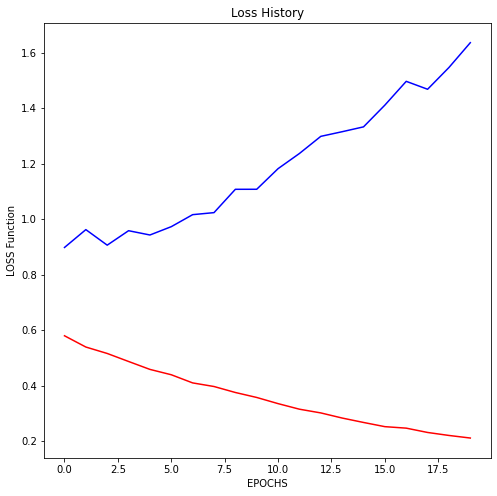

In [145]:
train_history = history.history['loss']
validation_history = history.history['val_loss']
fig = plt.figure(figsize=(8,8))
plt.title('Loss History')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS Function')
plt.plot(train_history, "red")
plt.plot(validation_history, "blue")


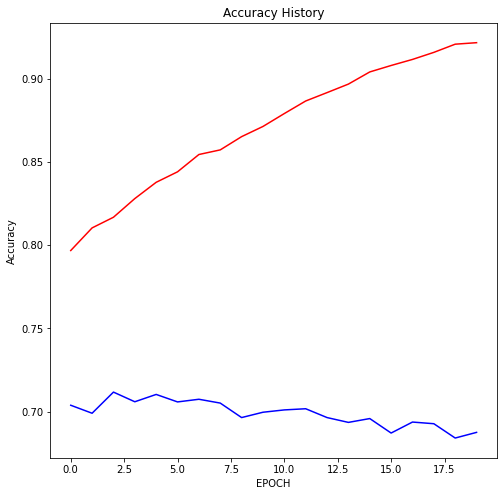

In [146]:
train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

In [147]:
#model3
x_train3 = x_train_ori/255.0
x_test3 = x_test_ori/255.0

In [163]:
model3 = keras.Sequential()
model3.add(keras.layers.Conv2D(32, (3, 3)))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.ReLU())
model3.add(keras.layers.MaxPooling2D(2,2))
model3.add(keras.layers.Conv2D(64, (3, 3)))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.ReLU())
model3.add(keras.layers.MaxPooling2D(2,2))
model3.add(keras.layers.Conv2D(64, (3, 3)))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.ReLU())
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(128, activation='relu'))
model3.add(keras.layers.Dropout(rate=0.5))
model3.add(keras.layers.Dense(10, activation='softmax'))


In [164]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [165]:
history = model3.fit(x_train3, y_train, epochs=20, validation_data=(x_test3, y_test))

Epoch 1/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5042 - accuracy: 0.4595 - val_loss: 2.1783 - val_accuracy: 0.3874
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1550 - accuracy: 0.6000 - val_loss: 1.2895 - val_accuracy: 0.5378
Epoch 3/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0108 - accuracy: 0.6504 - val_loss: 1.1324 - val_accuracy: 0.6154
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9148 - accuracy: 0.6835 - val_loss: 1.2496 - val_accuracy: 0.5865
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8455 - accuracy: 0.7096 - val_loss: 0.8943 - val_accuracy: 0.6891
Epoch 6/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.7872 - accuracy: 0.7289 - val_loss: 0.8570 - val_accuracy: 0.7087
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7423 - accuracy: 0.7448 - val_loss: 0.9458 - val_accuracy:

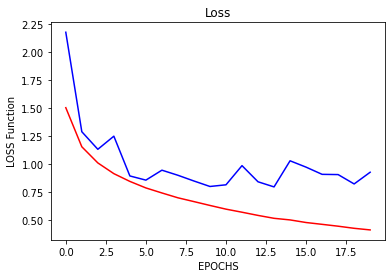

In [166]:
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.title('Loss')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS Function')
plt.plot(train_loss, 'red')
plt.plot(validation_loss, 'blue')


# 말과 사람 구분 

In [217]:
#read Image

file_name = os.listdir('./data_horse_human')
file_name

['horse', 'human']

In [218]:
from PIL import Image
data=[]
classes = os.listdir("data_horse_human")
for i, cls in enumerate(classes):
    print("Opening " + cls + "/")
    for el in os.listdir("data_horse_human/" + cls):
        img = Image.open("data_horse_human/" + cls + "/" + el)
        data.append((np.asarray(img), i)) #여기서 라벨링 함. 
        img.close()

random.shuffle(data)

Opening horse/
Opening human/


In [219]:
#문득 X, Y를 만들어두고 train_test_split을 쓸수 있는지 궁금 

data[0][0]
#이렇게 보니 앞에서 X, y를 만들 수 있지 않을까? 

array([[[ 59,  78,  32],
        [ 57,  77,  40],
        [ 55,  70,  39],
        ...,
        [143, 170, 213],
        [142, 170, 210],
        [142, 170, 210]],

       [[ 48,  65,  47],
        [ 48,  59,  27],
        [ 48,  62,  37],
        ...,
        [144, 169, 209],
        [147, 173, 208],
        [150, 174, 208]],

       [[ 41,  57,  54],
        [ 33,  45,  33],
        [ 45,  61,  50],
        ...,
        [143, 169, 206],
        [145, 169, 203],
        [146, 170, 204]],

       ...,

       [[234, 200, 172],
        [244, 209, 179],
        [239, 208, 180],
        ...,
        [239, 200, 169],
        [251, 212, 181],
        [254, 221, 190]],

       [[243, 209, 182],
        [248, 211, 184],
        [235, 201, 174],
        ...,
        [240, 203, 176],
        [243, 203, 177],
        [251, 214, 187]],

       [[248, 212, 180],
        [241, 206, 176],
        [211, 180, 152],
        ...,
        [253, 219, 192],
        [240, 206, 178],
        [234, 199, 171]]

In [220]:
x_train=[]
y_train=[]
x_test=[]
y_test =[]
for i in range(len(data)):
    if i<0.8*len(data):
        x_train.append(data[i][0])
        y_train.append(data[i][1])
    else:
        x_test.append(data[i][0])
        y_test.append(data[i][1])
        

In [221]:
x_train = np.asarray(x_train)/255.0
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)/255.0
y_test = np.asarray(y_test)

In [222]:
model = keras.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.5), # 정확도가 제대로 안나와서 추가함 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
    
])

In [223]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [224]:
stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [251]:
#history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[stop])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
26/26 [==============================] - 0s 13ms/step - loss: 0.4301 - accuracy: 0.8248 - val_loss: 0.3739 - val_accuracy: 0.8927
Epoch 2/20
26/26 [==============================] - 0s 11ms/step - loss: 0.4409 - accuracy: 0.8248 - val_loss: 0.3380 - val_accuracy: 0.9024
Epoch 3/20
26/26 [==============================] - 0s 11ms/step - loss: 0.4168 - accuracy: 0.8273 - val_loss: 0.3269 - val_accuracy: 0.8927
Epoch 4/20
26/26 [==============================] - 0s 11ms/step - loss: 0.3888 - accuracy: 0.8504 - val_loss: 0.3294 - val_accuracy: 0.9024
Epoch 5/20
26/26 [==============================] - 0s 11ms/step - loss: 0.4143 - accuracy: 0.8552 - val_loss: 0.2745 - val_accuracy: 0.9073
Epoch 6/20
26/26 [==============================] - 0s 11ms/step - loss: 0.3811 - accuracy: 0.8735 - val_loss: 0.2676 - val_accuracy: 0.9122
Epoch 7/20
26/26 [==============================] - 0s 11ms/step - loss: 0.3537 - accuracy: 0.8723 - val_loss: 0.3398 - val_accuracy: 0.8439
Epoch 8/20
26

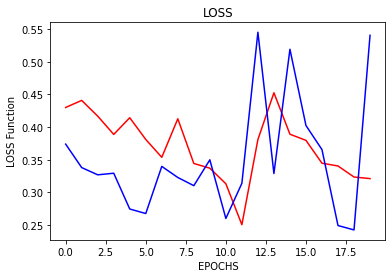

In [252]:
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.title("LOSS")
plt.xlabel('EPOCHS')
plt.ylabel('LOSS Function')
plt.plot(train_loss, 'red')
plt.plot(validation_loss,'blue')


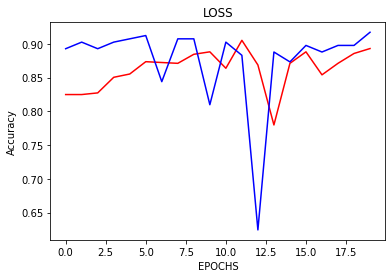

In [253]:
train_loss = history.history['accuracy']
validation_loss = history.history['val_accuracy']
plt.title("LOSS")
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.plot(train_loss, 'red')
plt.plot(validation_loss,'blue')

## 여기는 X와 y를 처음부터 따로 받은 것 - train_test_split 사용

In [228]:
from PIL import Image
X=[]
y=[]
classes = os.listdir("data_horse_human")
for i, cls in enumerate(classes):
    print("Opening " + cls + "/")
    for el in os.listdir("data_horse_human/" + cls):
        img = Image.open("data_horse_human/" + cls + "/" + el)
        X.append(np.asarray(img)) #여기서 라벨링 함.
        y.append(i)
        img.close()

Opening horse/
Opening human/


In [229]:
X

[array([[[109, 158, 217],
         [110, 158, 220],
         [113, 159, 221],
         ...,
         [242, 253, 255],
         [241, 255, 255],
         [241, 253, 253]],
 
        [[114, 159, 224],
         [114, 159, 224],
         [114, 159, 226],
         ...,
         [242, 253, 255],
         [241, 255, 255],
         [235, 250, 253]],
 
        [[116, 161, 226],
         [115, 160, 225],
         [114, 159, 224],
         ...,
         [242, 254, 254],
         [242, 255, 255],
         [238, 254, 254]],
 
        ...,
 
        [[207, 180, 153],
         [212, 182, 156],
         [221, 191, 165],
         ...,
         [254, 218, 192],
         [254, 228, 203],
         [254, 224, 196]],
 
        [[210, 182, 158],
         [219, 189, 163],
         [223, 191, 166],
         ...,
         [254, 222, 197],
         [251, 225, 200],
         [251, 221, 193]],
 
        [[208, 180, 156],
         [221, 189, 164],
         [219, 188, 160],
         ...,
         [253, 229, 203],
  

In [230]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [239]:
from sklearn.model_selection import train_test_split

In [240]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X,y, test_size=0.3, random_state=10)

In [241]:
x_train2 = np.asarray(x_train2)/255.0
y_train2 = np.asarray(y_train2)
x_test2 = np.asarray(x_test2)/255.0
y_test2 = np.asarray(y_test2)

In [254]:
#history2 = model.fit(x_train2, y_train2, epochs=25, validation_data=(x_test2, y_test2), callbacks=[stop])
history2 = model.fit(x_train2, y_train2, epochs=25, validation_data=(x_test2, y_test2)) # callback 없애니까 좀더 안정적인거 같은데 

Epoch 1/25
23/23 [==============================] - 0s 14ms/step - loss: 1.2393 - accuracy: 0.8134 - val_loss: 5.3655 - val_accuracy: 0.5243
Epoch 2/25
23/23 [==============================] - 0s 12ms/step - loss: 4.0012 - accuracy: 0.5780 - val_loss: 1.4091 - val_accuracy: 0.6343
Epoch 3/25
23/23 [==============================] - 0s 12ms/step - loss: 0.9221 - accuracy: 0.6657 - val_loss: 0.4818 - val_accuracy: 0.7864
Epoch 4/25
23/23 [==============================] - 0s 13ms/step - loss: 0.5573 - accuracy: 0.7869 - val_loss: 0.3692 - val_accuracy: 0.8835
Epoch 5/25
23/23 [==============================] - 0s 12ms/step - loss: 0.5695 - accuracy: 0.8120 - val_loss: 0.4922 - val_accuracy: 0.8511
Epoch 6/25
23/23 [==============================] - 0s 12ms/step - loss: 0.4947 - accuracy: 0.7953 - val_loss: 0.4194 - val_accuracy: 0.8317
Epoch 7/25
23/23 [==============================] - 0s 12ms/step - loss: 0.4680 - accuracy: 0.8022 - val_loss: 0.5699 - val_accuracy: 0.6375
Epoch 8/25
23

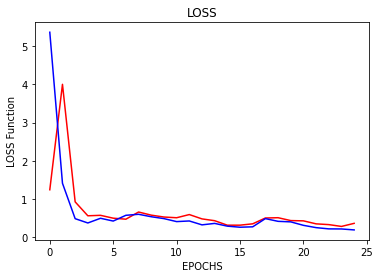

In [255]:
train_loss = history2.history['loss']
validation_loss = history2.history['val_loss']
plt.title("LOSS")
plt.xlabel('EPOCHS')
plt.ylabel('LOSS Function')
plt.plot(train_loss, 'red')
plt.plot(validation_loss,'blue')


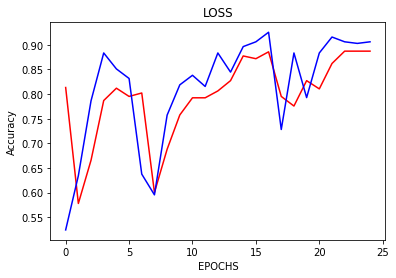

In [256]:
train_loss = history2.history['accuracy']
validation_loss = history2.history['val_accuracy']
plt.title("LOSS")
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.plot(train_loss, 'red')
plt.plot(validation_loss,'blue')

# GAN 

## 간단한 예제 해보기 

In [299]:
#MNIST를 이용한 GAN
mnist = datasets.mnist
(x_train, _), (_, _) = keras.datasets.mnist.load_data()

In [300]:
#형변환 
#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_train = x_train.astype('float32')
#x_train = x_train / 127.5 - 1


In [301]:
x_train.shape

(60000, 28, 28)

In [302]:
#Generator 생성(생성자)
Generator = keras.Sequential([
    keras.layers.Input(256,30),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(784, activation='sigmoid')
    
])

In [303]:
#Discriminator 생성(판별자)
Discriminator = keras.Sequential([
    keras.layers.Input(784),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [304]:
# define Optimizer
Doptimizer = tf.keras.optimizers.Adam(0.001)
Goptimizer = tf.keras.optimizers.Adam(0.001)

In [305]:
#학습 모델 생성 
def get_noise(batch_size,n_noise):
    return tf.random.normal([batch_size,n_noise])# 정규분포 난수 생성 

@tf.function
def train_step(inputs):

    with tf.GradientTape() as t1, tf.GradientTape() as t2:
        # 잡음으로부터 이미지 생성
        G = Generator(get_noise(30,256))
        # 판별자 입력
        Z = Discriminator(G)
        R = Discriminator(inputs)   
        # 손실 함수 연산
        loss_D = -tf.reduce_mean(tf.math.log(R) + tf.math.log(1 - Z))
        loss_G = -tf.reduce_mean(tf.math.log(Z))
    
    # 판별자 업데이트      
    Dgradients = t1.gradient(loss_D, Discriminator.trainable_variables) #손실함수와 모델의 가중치를 미분
    Doptimizer.apply_gradients(zip(Dgradients, Discriminator.trainable_variables)) #옵티마이저에 미분 적용 
    # 생성자 업데이트
    Ggradients = t2.gradient(loss_G,Generator.trainable_variables)
    Goptimizer.apply_gradients(zip(Ggradients, Generator.trainable_variables)) 

In [306]:
# 배치 사이즈
total_batch = int(60000/30) 
        
for epoch in tf.range(15):
    k = 0
    for i in tf.range(total_batch):
        batch_input = x_train.T[i*30:(i+1)*30]
        print(batch_input.shape)
    
        inputs = tf.Variable([batch_input],tf.float32)
        print('input',inputs.shape)
        train_step(inputs)
        print(k)
        k = k + 1

        # 생성된 이미지
        if k%100 == 0:
            G = Generator(get_noise(10,256))
        
            fig, ax = plt.subplots(1,10 ,figsize=(10, 1))
                
            for j in range(10):
                ax[j].set_axis_off()
                ax[j].imshow(np.reshape(G[j], (28, 28)).T,cmap='gray')
            plt.pause(0.001)
            plt.show()

(28, 28, 60000)
input (1, 28, 28, 60000)


ValueError: in user code:

    C:\Users\admin\AppData\Local\Temp/ipykernel_10440/748190543.py:13 train_step  *
        R = Discriminator(inputs)
    C:\Users\admin\anaconda3\envs\tfenv\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__  **
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\admin\anaconda3\envs\tfenv\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_40 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [1, 28, 28, 60000]
